# Co-relations Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\final_dataset.csv")

In [3]:
data.dtypes

Unnamed: 0                   int64
payer                       object
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
county_name                 object
age_group_code             float64
age_group_name              object
sex                         object
unique_member_cnt          float64
svc_code_ctg_desc           object
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
service                     object
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
dtype: object

In [5]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['sex', 'service', 'payer']:
    data[col + '_encoded'] = le.fit_transform(data[col])

data.dtypes

Unnamed: 0                   int64
payer                       object
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
county_name                 object
age_group_code             float64
age_group_name              object
sex                         object
unique_member_cnt          float64
svc_code_ctg_desc           object
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
service                     object
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int32
service_encoded     

In [6]:
drop_cols = ["payer","service","sex","county_name","age_group_name","svc_code_ctg_desc"]
new_data = data.drop(drop_cols,axis=1)
new_data.dtypes

Unnamed: 0                   int64
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
age_group_code             float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int32
service_encoded              int32
payer_encoded                int32
dtype: object

In [7]:
new_data = new_data.drop(["Unnamed: 0"],axis=1)
new_data.dtypes

insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
age_group_code             float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int32
service_encoded              int32
payer_encoded                int32
dtype: object

# Pearson correlation coefficient

In [8]:
correlation_matrix = new_data.corr(method='pearson')
print(correlation_matrix)

                         insurer_paid_amt_mean  insurer_paid_amt_sum  \
insurer_paid_amt_mean                 1.000000              0.339579   
insurer_paid_amt_sum                  0.339579              1.000000   
member_paid_amt_mean                  0.325372              0.139771   
member_paid_amt_sum                   0.071368              0.537246   
total_paid_amt_mean                   0.998918              0.340652   
total_paid_amt_sum                    0.328711              0.997167   
service_year                          0.014020              0.006517   
county_code                          -0.004143             -0.007486   
age_group_code                       -0.012283             -0.000725   
unique_member_cnt                    -0.013186              0.203362   
clm_cnt                               0.126500              0.520821   
member_months                        -0.013295              0.202197   
total_paid_amt_median                 0.944178              0.31

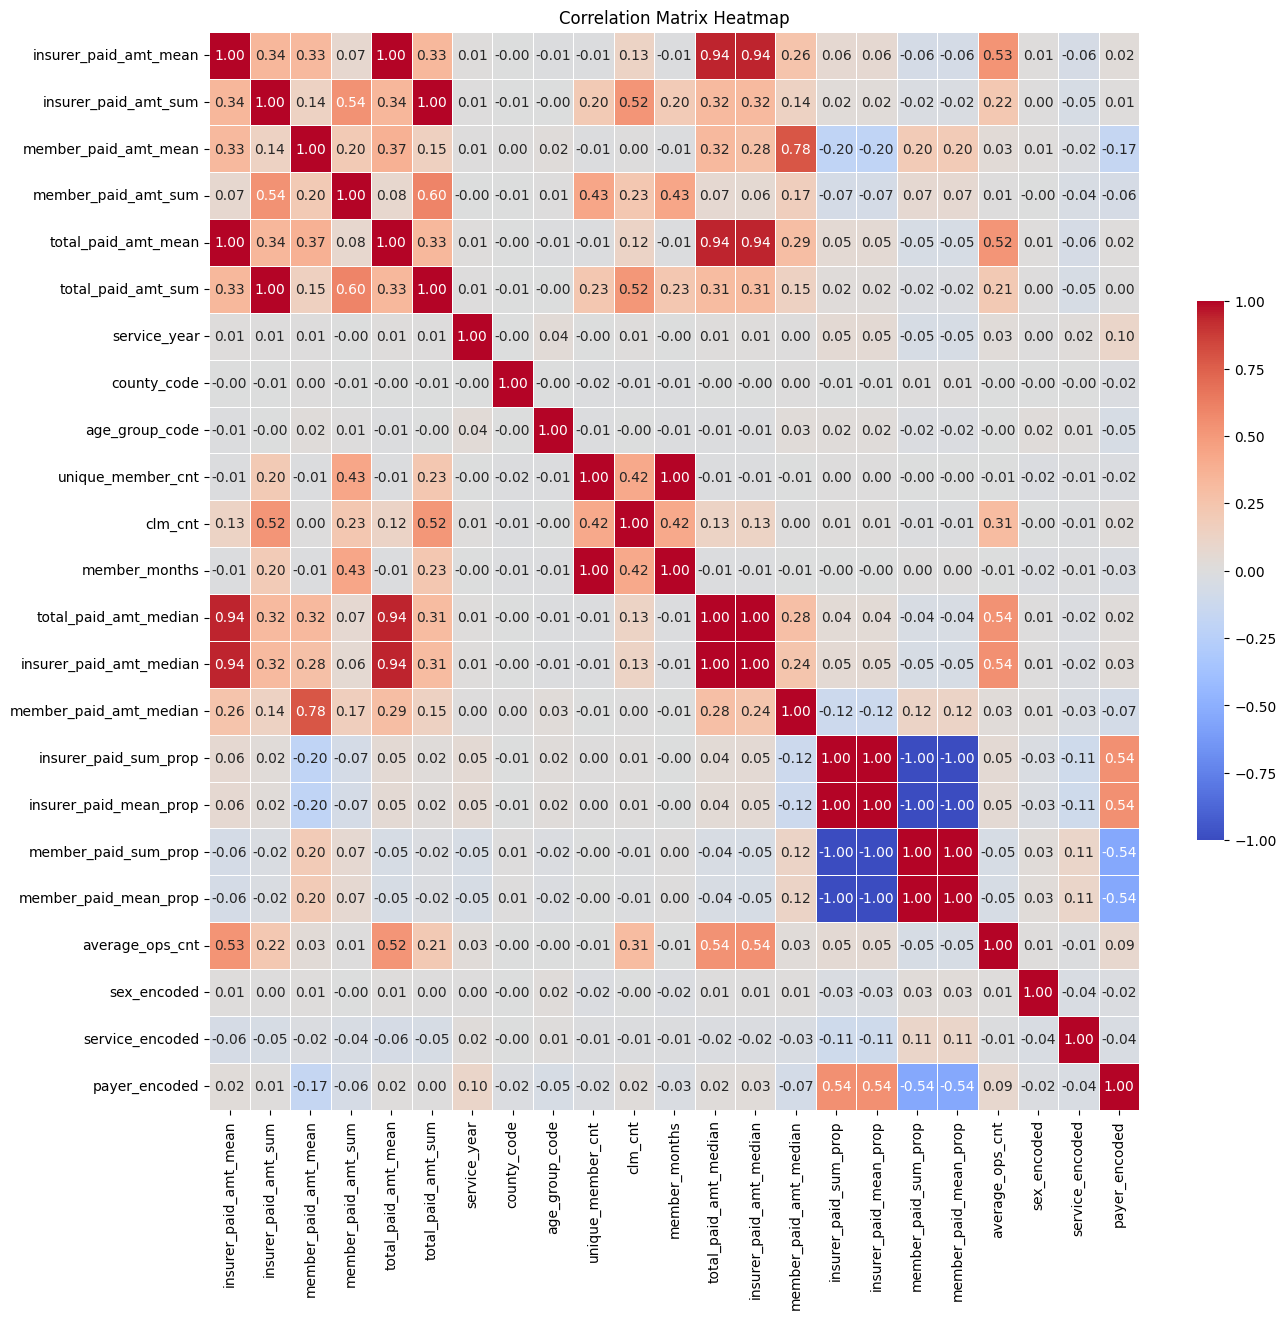

In [10]:
plt.figure(figsize=(15, 14))  # 设置图形的大小
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Correlation Matrix Heatmap')

plt.show()

# Chi-Squared Method

In [11]:
from scipy.stats import chi2_contingency

In [13]:
contingency_table = pd.crosstab(data['sex'], data['payer'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

payer  COMMERCIAL  MEDICARE  MINNESOTA HEALTH CARE PROGRAMS
sex                                                        
F         1161218   1398350                         1117343
M          964228   1223741                          835805
Chi2 statistic: 6869.290669281563
p-value: 0.0
Degrees of freedom: 2
Expected frequencies:
[[1166309.97835385 1438837.2593102  1071763.76233594]
 [ 959136.02164615 1183253.7406898   881384.23766406]]


In [16]:
def card_info(var_1,var_2):
    contingency_table = pd.crosstab(data[var_1], data[var_2])
    # print(contingency_table)
    print(var_1, var_2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi2 statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print("----------------------------------------")

In [17]:
cate_data = ["payer","service","sex","county_name","age_group_name","svc_code_ctg_desc"]
for i in range(0,len(cate_data)):
    for j in range(i+1, len(cate_data)):
        card_info(cate_data[i],cate_data[j])

payer service
Chi2 statistic: 348292.552616019
p-value: 0.0
Degrees of freedom: 58
Expected frequencies:
[[1.40537886e+04 1.16040660e+04 2.41460874e+04 1.93284477e+05
  2.88142951e+03 1.49083209e+01 2.52489860e+03 7.62544752e+02
  1.28644218e+05 2.46729538e+04 3.59227093e+03 1.37695789e+03
  1.90865205e+05 3.53929881e+03 5.92742150e+04 3.84688602e+05
  1.91904981e+02 2.34047950e+04 1.62751284e+04 1.37775089e+04
  5.29555293e+05 2.14267463e+03 5.15745430e+04 1.81088519e+03
  1.98330150e+05 1.68796450e+05 2.39928806e+04 1.66579868e+04
  9.59429747e+03 2.34155797e+04]
 [1.73376847e+04 1.43155446e+04 2.97882132e+04 2.38448536e+05
  3.55472234e+03 1.83918923e+01 3.11488219e+03 9.40725726e+02
  1.58704030e+05 3.04381905e+04 4.43166342e+03 1.69870648e+03
  2.35463962e+05 4.36631350e+03 7.31245986e+04 4.74577346e+05
  2.36746699e+02 2.88737057e+04 2.00780767e+04 1.69968477e+04
  6.53294494e+05 2.64334538e+03 6.36257732e+04 2.23402794e+03
  2.44673213e+05 2.08238483e+05 2.95992071e+04 2.0550396

The results for Chi-Squared are strange, it's probably caused by the size of dataset. 

# Boxplot

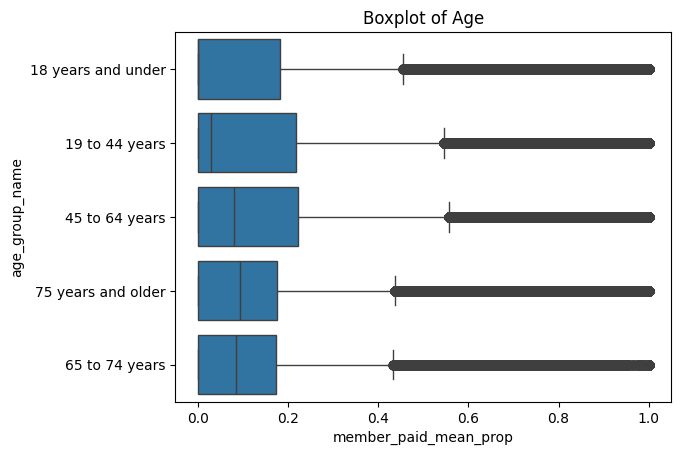

In [24]:
sns.boxplot(data=data, x="member_paid_mean_prop",y='age_group_name')
plt.title('Boxplot of Age')
plt.show()

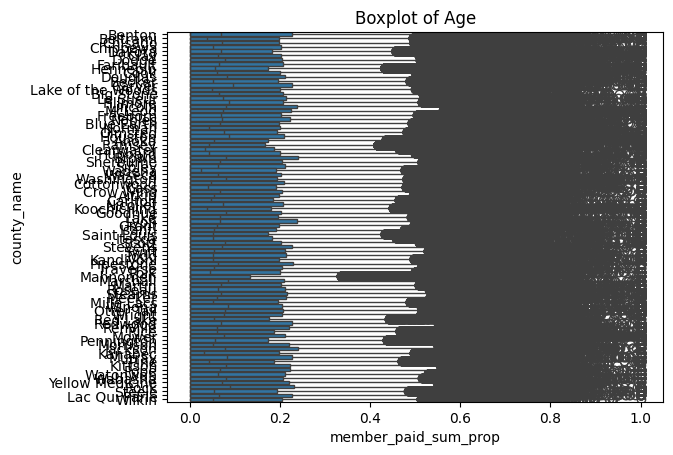

In [23]:
sns.boxplot(data=data, x="member_paid_sum_prop",y='county_name')
plt.title('Boxplot of Age')
plt.show()

# Random Forest

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [30]:
X = new_data.drop(["age_group_code"],axis=1)
y = new_data["age_group_code"]

#ss = StandardScaler()
#X = ss.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5360548, 22), (1340137, 22), (5360548,), (1340137,))

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(features_df.sort_values(by='Importance', ascending=False))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
oob_error = 1 - model.oob_score_

print(f'MSE: {mse}, R²: {r2}')
print(f'Cross-validated MSE: {np.mean(cross_val_scores)}')
print(f'OOB Error: {oob_error}')

                    Feature  Importance
21            payer_encoded    0.094103
18          average_ops_cnt    0.072840
7               county_code    0.056241
4       total_paid_amt_mean    0.055813
0     insurer_paid_amt_mean    0.055468
10            member_months    0.055317
11    total_paid_amt_median    0.054647
12  insurer_paid_amt_median    0.053389
1      insurer_paid_amt_sum    0.052420
5        total_paid_amt_sum    0.052355
9                   clm_cnt    0.047872
8         unique_member_cnt    0.040160
6              service_year    0.040097
20          service_encoded    0.039977
16     member_paid_sum_prop    0.034417
2      member_paid_amt_mean    0.033986
14    insurer_paid_sum_prop    0.033948
15   insurer_paid_mean_prop    0.033042
3       member_paid_amt_sum    0.033005
17    member_paid_mean_prop    0.032052
13   member_paid_amt_median    0.019198
19              sex_encoded    0.009651
